In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [28]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [13]:
# reflect an existing database into a new model
Base = automap_base()
Base.prepare(engine, reflect=True)
# reflect the tables


In [7]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Station = Base.classes.station
Measurement = Base.classes.measurement

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [22]:
# Find the most recent date in the data set.
recent_date = (session.query(Measurement.date)
                      .order_by(Measurement.date.desc())
                      .first()
              )
recent_date[0]

'2017-08-23'

In [72]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
most_recent_date = dt.datetime.strptime(recent_date[0], "%Y-%m-%d")

# Calculate the date one year from the last date in data set.
one_year_earlier = most_recent_date - dt.timedelta(weeks=52)

# Perform a query to retrieve the data and precipitation scores
date_precip = (session.query(Measurement.date, Measurement.prcp)
                      .filter(Measurement.date > one_year_earlier)
                      .all()
              )

# Save the query results as a Pandas DataFrame and set the index to the date column
date_precip_df = (pd.DataFrame(date_precip, columns=["Date", "Precipitation"])
                    .set_index("Date")
                 ).groupby("Date").max()
date_precip_df.head(10)

,Precipitation
Date,
2016-08-25,0.21
2016-08-26,0.04
2016-08-27,0.18
2016-08-28,2.07
2016-08-29,0.90
2016-08-30,0.05
2016-08-31,2.46
2016-09-01,0.02
2016-09-02,0.19


In [73]:
# Sort the dataframe by date
date_precip_df = date_precip_df.sort_values(by="Date")
date_precip_df

,Precipitation
Date,
2016-08-25,0.21
2016-08-26,0.04
2016-08-27,0.18
2016-08-28,2.07
2016-08-29,0.90
...,...
2017-08-19,0.09
2017-08-20,0.01
2017-08-21,0.56


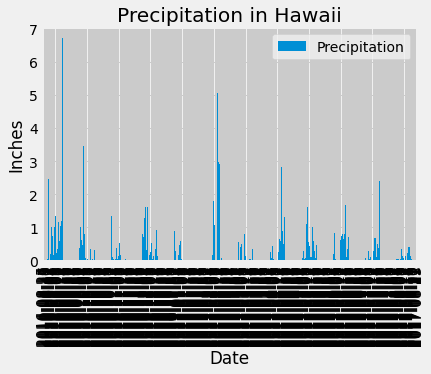

In [78]:
# Use Pandas Plotting with Matplotlib to plot the data
date_precip_df.plot.bar(rot=90)
plt.title("Precipitation in Hawaii")
plt.ylabel("Inches")
plt.show()

In [ ]:
# Use Pandas to calcualte the summary statistics for the precipitation data


# Exploratory Station Analysis

In [ ]:
# Design a query to calculate the total number stations in the dataset


In [ ]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.


In [ ]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.


In [ ]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


# Close session

In [ ]:
# Close Session
session.close()